# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [35]:
# Observations
# By analyzing the final tumor volumes, we can determine which drug regimens are more effective in reducing tumor size. 
# Diffrens responds among individual mice within each drug regimen underscore importance of personalized medicine. 
# Larger tumore volumes is observed in heavier mice.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# # Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# # Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
print(merged_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [37]:
# Checking the number of mice.
num_mice = merged_data["Mouse ID"].nunique()
print("Number of uniqe mice:", num_mice)

Number of uniqe mice: 249


In [38]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
print(duplicate_mice_ids)


['g989']


In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = merged_data[merged_data.duplicated(subset="Mouse ID", keep=False)]
print("Data for duplicate Mouse Ids")
print(duplicate_mice_data)

Data for duplicate Mouse Ids
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898    

In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.drop_duplicates(subset=["Mouse ID"], keep="first")
print("Clean DataFrame without duplicate mouse")
print(clean_data)
print(merged_data.columns)

Clean DataFrame without duplicate mouse
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
10       s185    Capomulin  Female           3          17          0   
20       x401    Capomulin  Female          16          15          0   
30       m601    Capomulin    Male          22          17          0   
40       g791     Ramicane    Male          11          16          0   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
0                   45.0              

In [41]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data["Mouse ID"].nunique()
print( "Number of unique mice in the clean DataFrame", num_mice_clean)



Number of unique mice in the clean DataFrame 249


## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Group the data by regimen and calculate statistics
summary_statistics = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_statistics.columns = ['Mean Tumor Valume', 'Median Tumor Valume', 'Variance Tumor Valume', 'Standard Deviation Tumor Valume', 'SEM Tumor Valume']

# Display the summary statistics table
print(summary_statistics)


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame(summary_statistics)

              Mean Tumor Valume  Median Tumor Valume  Variance Tumor Valume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Standard Deviation Tumor Valume  SEM 

In [43]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
aggregation = {
    'Mean' : 'mean',
    'Median' : 'median',
    'Variance' : 'var',
    'Standard Deviation' : 'std',
    'SEM' : 'sem'
}


# # Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(Mean='mean', Median='median', Variance='var', Standard_Deviation='std', SEM='sem'
) 

print(summary_statistics)




                   Mean     Median   Variance  Standard_Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

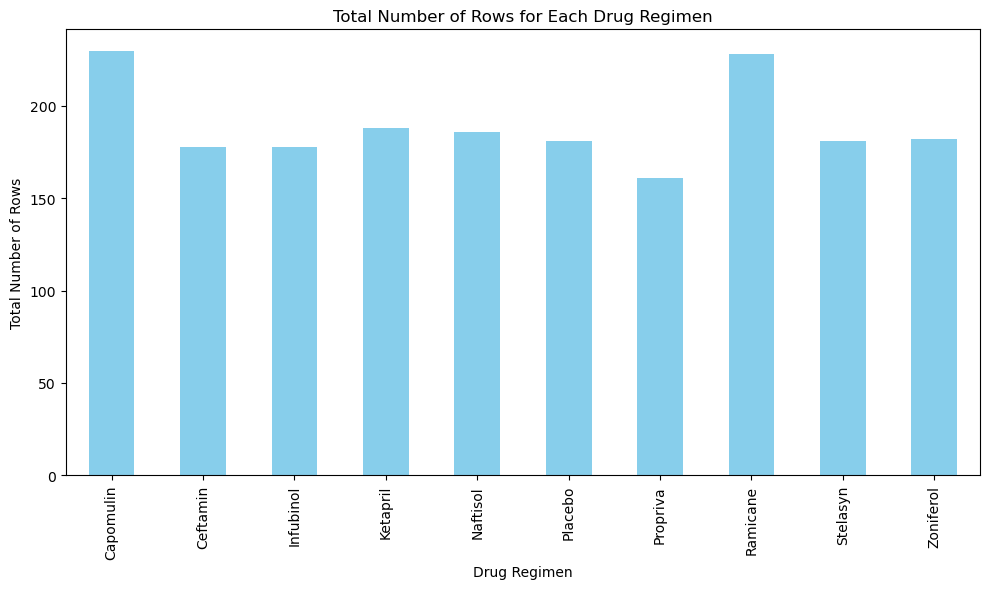

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = merged_data.groupby('Drug Regimen').size()

# create bar plot using Pandas

regimen_counts.plot(kind="bar", facecolor="skyblue" ,figsize=(10,6),  xlabel="Drug Regimen", ylabel="Total Number of Rows", title="Total Number of Rows for Each Drug Regimen")

# Show plot
plt.tight_layout()
plt.show()

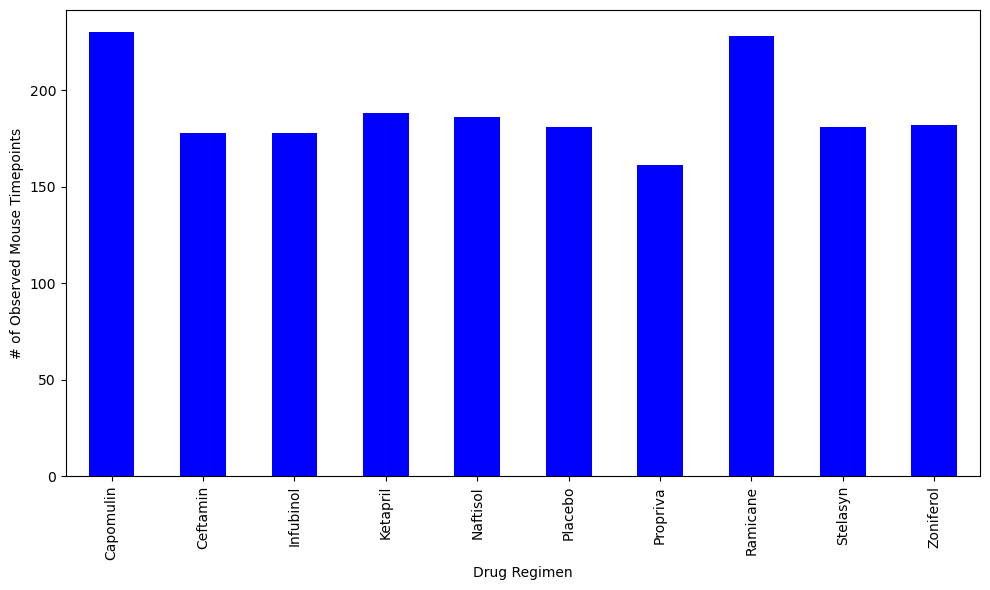

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_counts = merged_data.groupby('Drug Regimen').size()

# Creat bar plot using pyplot


regimen_counts.plot(kind="bar", facecolor="blue" ,figsize=(10,6),  xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")

# Display the plot
plt.tight_layout()
plt.show()




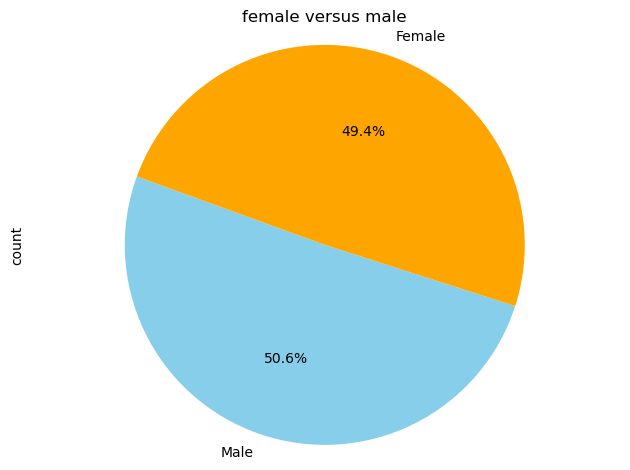

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = merged_data["Sex"].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'], title='female versus male', startangle=160)
plt.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()

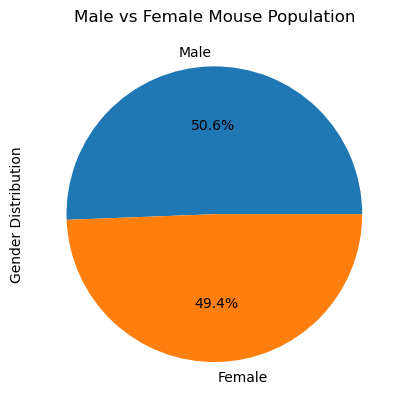

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Labels=['Female', 'Male']
plot = gender_distribution.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Gender Distribution')
plt.show()


## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = merged_data[merged_data['Drug Regimen'].isin(selected_regimens)]



# Start by getting the last (greatest) timepoint for each mouse
max_timepoints_per_mouse = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(max_timepoints_per_mouse, filtered_data, on=['Mouse ID', 'Timepoint'], how='inner')

print(final_tumor_volumes)

   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743                 1  
2            62.99

In [51]:
# # Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for treatment in treatments:
    print(treatment)

drug_data = pd.DataFrame({
    'Mouse ID': ['A1', 'A2', 'A3'],
    'Tumor Volume (mm3)': [45.6, 50.2, 42.8]
})


# # Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
for index, row in final_tumor_volumes.iterrows():
       tumor_volume_data.append(row['Tumor Volume (mm3)'])
       print(tumor_volume_data)

tumor_volume_data = drug_data['Tumor Volume (mm3)']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Q1 = np.percentile(tumor_volume_data, 25)
Q3 = np.percentile(tumor_volume_data, 75)
IQR = Q3 - Q1

  # Determine outliers using upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
  

potential_outliers = [x for x in tumor_volume_data if x < lower_bound or x > upper_bound]

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in merged_data['Drug Regimen'].unique():
     drug_data = merged_data[merged_data['Drug Regimen'] == drug]

    
    # add subset 

    
]


# Print the results
print("Drug Regimen:", drug)
print("Interquartile Range (IQR):", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Potential Outliers:", potential_outliers)
print() 


SyntaxError: unmatched ']' (1236781877.py, line 41)

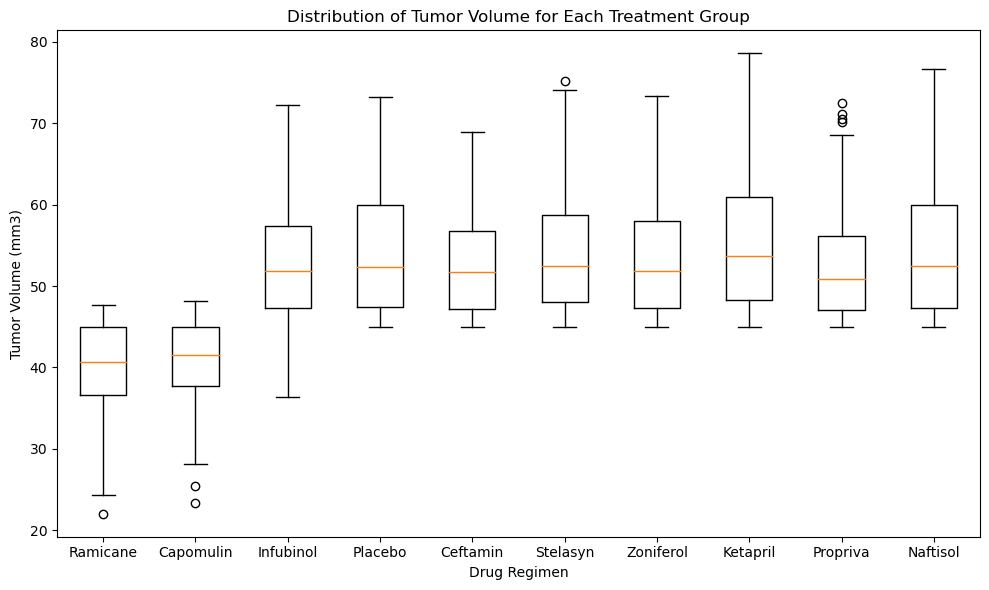

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_data = [merged_data[merged_data['Drug Regimen'] == drug]['Tumor Volume (mm3)'] for drug in merged_data['Drug Regimen'].unique()]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=merged_data['Drug Regimen'].unique())

plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

plt.tight_layout()
plt.show()


## Line and Scatter Plots

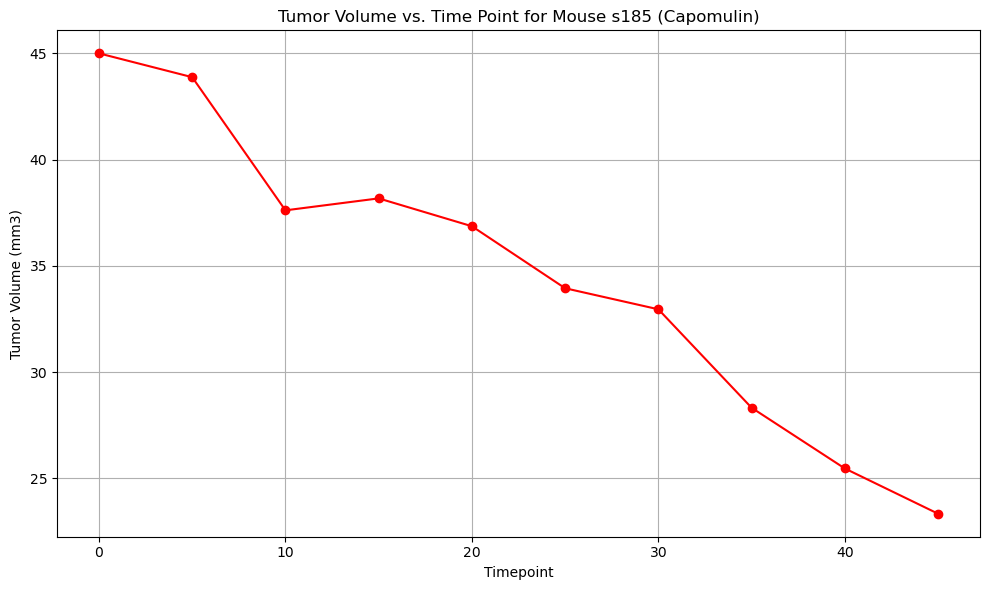

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']
selected_mouse = capomulin_data['Mouse ID'].iloc[0]

selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse]

# Plot the tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='red', linestyle='-')

# plote label and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse} (Capomulin)')

plt.grid(True)
plt.tight_layout()

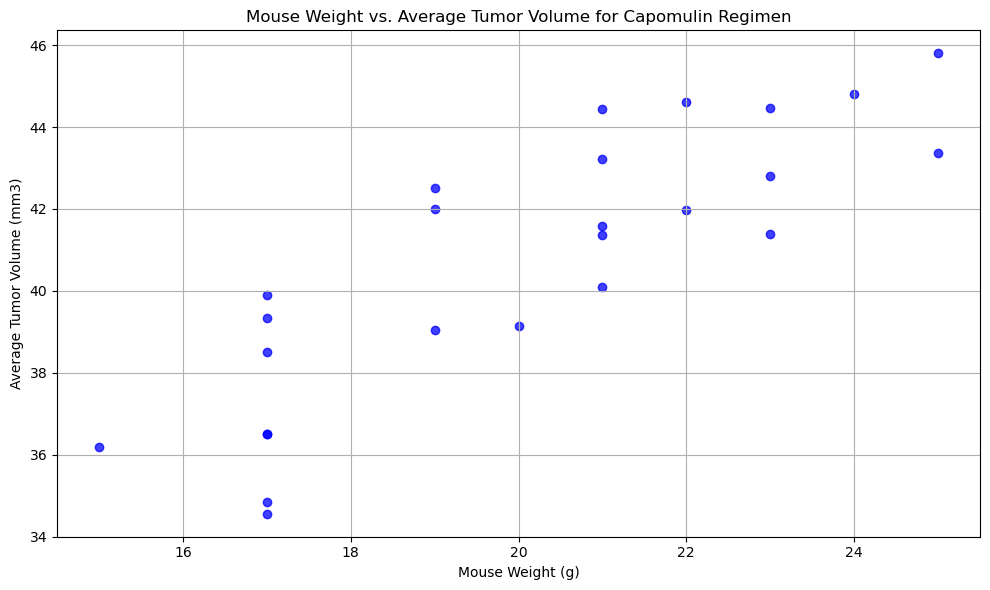

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_tumor_volume = merged_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

merged_data_with_weight = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

capomulin_data = merged_data_with_weight[merged_data_with_weight['Drug Regimen'] == 'Capomulin']

# Create a scatter plot of mouse weight vs. the average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], color='blue', alpha=0.75)

# Scatter plote title and label

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation and Regression

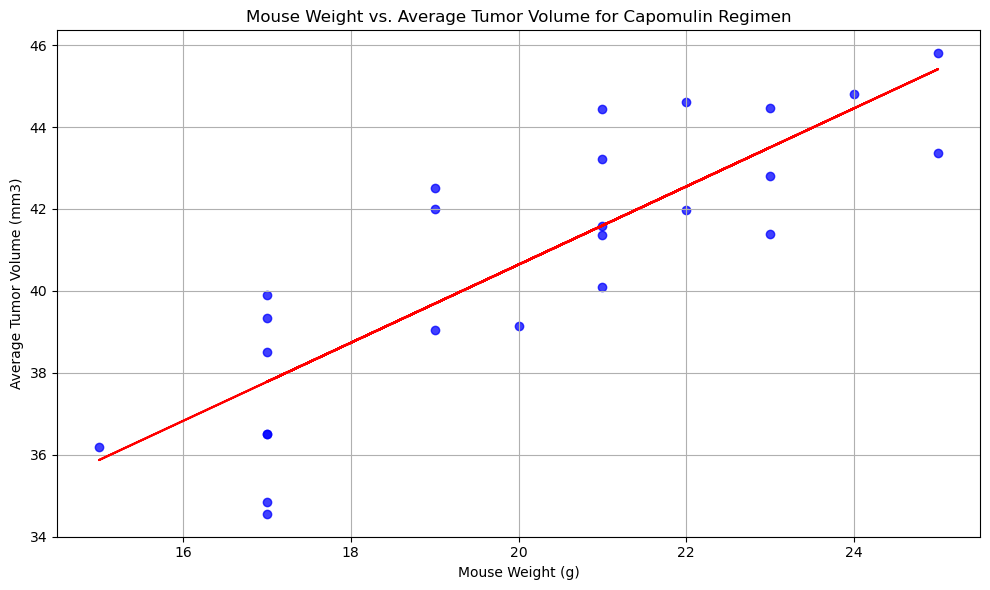

Correlation Coefficient: 0.8419363424694722
Linear Regression Slope: 0.9544396890241048
Linear Regression Intercept: 21.552160532685008
R-squared Value: 0.7088568047708723
P-value: 1.3225722434712404e-07
Standard Error: 0.12754359033201323


In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
merged_data_with_weight = pd.merge(average_tumor_volume, mouse_metadata, on='Mouse ID', how='left')

correlation_coefficient = merged_data_with_weight['Weight (g)'].corr(merged_data_with_weight['Tumor Volume (mm3)'])

#Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data_with_weight['Weight (g)'], merged_data_with_weight['Tumor Volume (mm3)'])

#Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data_with_weight['Weight (g)'], merged_data_with_weight['Tumor Volume (mm3)'], color='blue', alpha=0.75)

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

# Plot the linear regression line
plt.plot(merged_data_with_weight['Weight (g)'], slope * merged_data_with_weight['Weight (g)'] + intercept, color='red')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print correlation coefficient and regression parameters
print("Correlation Coefficient:", correlation_coefficient)
print("Linear Regression Slope:", slope)
print("Linear Regression Intercept:", intercept)
print("R-squared Value:", r_value ** 2)
print("P-value:", p_value)
print("Standard Error:", std_err)

